![tud_logo.jpg](attachment:tud_logo.jpg)

# Lab 4 - Sensitive Attributes and Data Bias
Week 4 - Q3, 22/23 <br>
SEN163B: Responsible Data Analytics<br>
 

By <b> Nadia Metoui* </b> <br>
TA <b> Anagha Magadi Rajeev</b> <br> 
Faculty of Technology, Policy, and Management (TPM)<br>

<small>*Acknowledgement: Part of this lab is loosely based on the code developed by <i><b>Agathe Balayn</b></i> and <i><b>Seda Gürses</b></i>

***Learning Objectives***<br>
At the end of this lab, you will be able to 

- Use data analytics tools to identify Sensitive attributes and proxies
- Use data analytics tools to identify Representation Bias
- Use data analytics tools to identify Historical Bias 
- Understanding, Analyse and Discuss Historical, Representation and Measurement Biases

***Structure***
- Part I. Understanding the Use Case
- Part II Protected attributes, proxies
- Part III: Representation Disparities, Skew and Bias
- Part IV. Discuss Measurement Bias

<H2> </H2>

## Part I. Understanding the Use Case

<b>Use Case Description</b> In this Lab you will be exploring a use case where a Bank wants to develop an ML-based data product in the form of ADM (automate decision system) to decide whether to <b>grant</b> or <b>not to grant</b> a loan to a given applicant. To do so the Bank uses historical data containing multiple application records, characterized by information about the loan applicants (e.g., age, gender, personal situation) and information about the loan (e.g., amount, duration, purpose). Each application is labeled <i><b> good credit </b></i> if the loan had been reimbursed or <i><b>bad credit</b></i> if the loan has not been reimbursed or if there where several issues with the reimbursement.

During this lab we will not concern our selves yet with developping (coding) the data analytics product itslef. 
We will rather explore the data using data analytics tools then reflect on three categories of Bias inspired by (Suresh and Guttag 2019)
- <i>Historical Bias</i>: Case Analysis, Sensitive attributes, Data skew
- <i>Representation Bias</i>: Case Analysis, Sensitive attributes, Distributions
- <i>Measurement Bias</i>: Case Analysis 



 
<i><b>German credit dataset</b></i> contains 1000 entries with 20 attributes (7 numerical, 13 categorical) prepared by Prof. Hofmann. We will use the version hosted in the <a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">UCI Machine Learning Archive</a>.<br>

In this dataset, each entry represents a person who took a credit from a german bank. We have no information about the date/year of the data collcetion. However, for the sake of this exercise, we will assume the data was collected in 2018.  

You can download the dataset here: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data<br>

The original data is encoded in a complex way. You can find information about the dataset and its attributes here: (https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc).<br>

We also provide you with the code to preprocess the data in more comprehensive attributes and featuers. 






Analysis Steps
- Step 1: Set-up (Provided)
- Step 2: Explore and familiarize with the dataset


### Setp 1: Set-up

You first need load (usually no installation is needed) the required libraries for this part.  The main libraries are `numpy`, `pandas`, `matplotlib` and `seaborn`. We recommend using these to easily manipulate and explore the data but you are free to use any other libraries you are more familar with.

We will introduce the data visualization tool 

<div class="alert alert-block alert-danger">
<b>Note:</b> Uncomment and run the next cell if you have not previously installed the libraries.
</div>


<b>Installing required libraries</b>

In [7]:
# If you need to install any new libraries, add the code here 

# install AIF 360 Toolkit
!pip install aif360


<b>Loading required libraries</b>

In [8]:
# Libraries for data processing and visualiztion 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown, display


# we will use the Faireness Tool IBM AI Fairness 360 only to help formatting the german data set 
# Please ignore this at the moment we will learn more about it in Week 6
from aif360.datasets import GermanDataset

pip install 'aif360[LawSchoolGPA]'


### Step 2: Explore and familiarize with the dataset

<b>Q1: Analyse the dataset and answer the following:</b> 
- What is the number of records?
- What is the number of attributes present with the preprocessing we provided? 
- What is the list of attribute names?
- Are there missing values that could create biases?

In [9]:

import pickle

with open('data.pickle', 'rb') as f:
    data = pickle.load(f, encoding='binary')
data

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,OCC,OCC_END
0,506547392,03/29/2018,20:30:00,<NA>,NaN,32.0,2018-03-30,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F,2018-03-29,<NA>
1,629632833,02/06/2018,23:15:00,<NA>,NaN,52.0,2018-02-07,341,PETIT LARCENY,333.0,...,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,D,2018-02-06,<NA>
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,2018-11-21,341,PETIT LARCENY,321.0,...,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D,2018-11-21,11/21/2018
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,2018-06-10,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F,2018-06-09,06/09/2018
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,2018-11-10,341,PETIT LARCENY,333.0,...,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,D,2018-11-10,11/10/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,104527061,05/01/2008,18:55:00,05/01/2018,19:00:00,10.0,2018-05-01,235,DANGEROUS DRUGS,511.0,...,40.756788,-73.996540,"(40.756788048, -73.996539912)",PATROL BORO MAN SOUTH,NaN,NaN,UNKNOWN,E,2008-05-01,05/01/2018
7825495,284201488,05/18/2018,14:50:00,05/18/2018,14:55:00,122.0,2018-05-22,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,40.577953,-74.102317,"(40.577953265, -74.102316756)",PATROL BORO STATEN ISLAND,NaN,<18,WHITE HISPANIC,M,2018-05-18,05/18/2018
7825496,808565901,11/19/2018,02:25:00,11/19/2018,02:30:00,110.0,2018-11-19,109,GRAND LARCENY,421.0,...,40.743188,-73.862427,"(40.743188053, -73.862427079)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,2018-11-19,11/19/2018
7825497,649441648,02/03/2018,10:02:00,02/03/2018,12:15:00,122.0,2018-02-03,578,HARRASSMENT 2,638.0,...,40.593665,-74.089000,"(40.593664627, -74.089000194)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M,2018-02-03,02/03/2018


In [10]:
data['Year']=data['OCC'].dt.year 
data['Year'] = data['Year'].astype(str)
demographic = data.loc[data['Year'] == '2010']

- 

In [13]:
### Some possible explorations ###
# Number of records:

# Number of features:

# Feature names:

# Number of missing values for each attribute ...

<div class="alert alert-block alert-success">
<b>Correct Answer:</b>
</div>

In [14]:
# Number of records:
print("Number of records: ",  len(data))
# Number of features:

print("Number of features: ",  data.shape[1])

# Feature names:
print("Names of features: ",  list(data.columns))



# Are there missing values that could create biases
# print(pd_gdata.isin(['NA']).sum(axis=0))
print("Number of missing values for each attribute: ", data.isnull().sum())

Number of records:  7798898
Number of features:  38
Names of features:  ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE', 'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'OCC', 'OCC_END', 'Year']
Number of missing values for each attribute:  CMPLNT_NUM                 0
CMPLNT_FR_DT               0
CMPLNT_FR_TM              47
CMPLNT_TO_DT         1732977
CMPLNT_TO_TM         1734018
ADDR_PCT_CD             2069
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18755
PD_CD                   6585
PD_DESC                 6585
CRM_ATPT_CPTD_CD         167
LAW_C

## Part II Protected attributes, proxies.

### Step 1: Sensitive and Protected Attributes

<b>Q2: Identification of protected attributes</b>

a) Study the dataset and its documentation and identify which attributes that might raise unfairness concerns and should be considered protected (according to the law). Explain, in your opinion, why are these attributes protected provide exaples of bias or unfaireness for each identified attribute. 

<div class="alert alert-block alert-info">
<b>Tip:</b> 

Take a look at the following documents<br>
<a href="https://www.equalityhumanrights.com/en/equality-act/protected-characteristics">(1) 
Protected characteristics | Equality and Human Rights Commission (UK, 2021)</a><br>
<a href="https://rm.coe.int/discrimination-artificial-intelligence-and-algorithmic-decision-making/1680925d73">(2) Discrimination, Artificial Intelligence, and Algorithmic Decision-Making (2018)</a><br>
<a href="http://ec.europa.eu/social/BlobServlet?docId=1691&langId=en&usg=AOvVaw3vI30bO3jisairH2Z7-nSl">(3) Age discrimination and European Law (2005)</a>. 
<div> 



-

b) Study the dataset and its documentation and identify any further sensitive but "non-protect" attributes that could cause unfairness. Explain your reasoning. Provide examples of bias or unfairness related to each attribute in your context.

***Hint:*** Protected attributes are sensitive attributes protected by law. This changes from one country/region to another. Sensitive attributes are attributes that could cause historical bias and can be protected by law or not depending on these countries/regions 

-

<div class="alert alert-block alert-success">
<b>Correct Answer:</b>

    
<b>Q2 - a)</b> From the documentation, personal status and sex (these two are combined into one single attribute - only gender is mentioned directly) and age could be considered protected, based on regulations. Gender is mentioned clearly in the documents. Age seems to be a complicated topic for which no definite answer is given. 

---------------

<b>Q2 - b)</b> There is one attribute which is "personal status and sex" in the original data. 

The values for "sex" appear to be either "male" or "female", which can be considered a simplification, that might leave apart certain persons.

Among the values of these attributes, the values taken by male and female are different (e.g. 'married/widowed' or 'divorced/separated for male', 'divorced/separated/married' for female). We pre-process the attribute to divide it into two attributes, one for the 'sex' and one for the 'personal status', but we might wonder whether that is relevant since the personal status is automatically intertwined with the sex.

What about "foreign worker" for instance? This attribute does not correspond fully to an active choice, but mostly to an "inherent" characteristic of a person, using this might serve to discriminate poorer communities.
    
</div>



### Step 2: Identify Proxies

<b>Q3:  Identification of "spurious" proxies </b>

a) Find the proxies for the attribute "sex".

b) Find proxies for one additional protected attribut you identified in Q2-a.

c) In your opinion, why do we want to identify proxies for protected attributes in a dataset? How should you handle the proxies?

<div class="alert alert-block alert-info">
<b> Tip: </b>A proxy attribute <i>Ap</i>  is an attribute that has a similar distribution as another attribute <i>Ax</i>, so having access to the proxy attribute <i>Ap</i> provides a good knowledge of the other attribute <i>Ax</i>. For instance, in the US the zipcode is a powerful proxy for race and education, the zipcode combined with websites visited is an even more powerful proxy, names in certain languages are strong proxies for gender, etc.<br>

The simplest way to identify proxy attributes for a protected attribute <i>Ax</i> is to compute the correlation of <i>Ax</i>  with each other attributes in the dataset. The higher the corrolation (absolute value of the corrolation) the higher the likelihood an attribute is a proxy of <i>Ax</i> <br>

You can use the `corr()` function of the pandas library to compute the correlation between two attributes
</div> 


   

<div class="alert alert-block alert-success">
<b>Correct Answer:</b>
    
<b>Q3 - a)</b>  For sex, as expected, attributes related to the personal status are proxy attributes. Correlation of 'personal_status=single' 0.74, of 'personal_status=divorced/separated/married' -1.0.

---------------

<b>Q3 - b)</b> For age (or other protected attribut), it seems there is no proxy attribute (correlations remain rather low, under 0.25).  "foreign_worker" related attributes are proxies for each other ("foreign_worker=yes", "foreign_worker=no").


---------------

<b>Q3 - c)</b> We want to search for proxies because even if the law does not forbid to use such proxies to make decisions, it forbids to use the protected attributes, and using a proxy attribute is exactly the same as using this attribute (when correlation is very high ). The information of a proxy gives away the information about an attribute we might not want to use.
Depending on the reason why a proxy exists, this could be handled by not using it in the training dataset, or collecting better data to populate it or modifying its values such as for the personal status attribute where we might want to get finer grain information or aggregate its values only into single and not single as these are independent from sex. However, it is to note that simply removing the protected attributes and their proxies is not enough to make the classifiers fair as more correlations might be there. Also, it is better to have access to it in the test data in order to actually measure the unfairness of the classifier.
</div>

## Part III: Representation Disparities, Skew and Bias </H3>

### Step 1: Representation Disparity --> Representation Bias

<br>
<b>Q4: Is your data representative of the population (all its categories)</b>

The aim of this section is to ensure the data is representative of the population it describes. While paying particular attention to sensitive and protected attributes.

Use any combination of data visualisations, Tables, Textual "Statistics" and Textual analysis to address these guiding questions.

a) Is the dataset we are working with representative of the German population with regard to age? Add any needed code or analysis to briefly justify your answer<br>
b) Is the dataset we are working with representative of the German population with regard to gender? Add any needed code or analysis to briefly justify your answer
c) Look at the joint distribution of the attributes for sex and personal_status=divorced/separated/married. Does the dataset seem to be representative of the German population?<br>
d) Similarly, look at the distribution of foreign workers. Does the dataset seem to be representative of the German population?<br>

<div class="alert alert-block alert-info">
<b> Tip: </b> You can find demographic information from Wikipedia <a href=https://en.wikipedia.org/wiki/Demographics_of_Germany>[Here]</a>
    
Go to section <b><i>Demographic statistics</i></b> take a closer look at the most racent  <b><i>Age structure</i></b> data (it should be from 2018). Use this data to build a distribution of german population across age, then across gender and compare it to the distributions from <b><i>the German credit data</i></b> we are working with.

It is up to you how you want to justify your answer, however using visualizations will provide more points (i.e., plots and diagram)
</div>
    

In [15]:
# write you code here 
# 


-

<div class="alert alert-block alert-success">
<b>Correct Answer:</b>

<u>Wikipedia Data from 2018</u><br>
0-14 years: 12.83% (male 5,299,798 /female 5,024,184)<br>
15-24 years: 9.98% (male 4,092,901 /female 3,933,997)<br>
25-54 years: 39.87% (male 16,181,931 /female 15,896,528)<br>
55-64 years: 14.96% (male 5,989,111 /female 6,047,449)<br>
65 years and over: 22.36% (male 7,930,590 /female 10,061,248)<br><br>

female population: 50.76% 
male population: 49.24%
    
<br>



In [16]:
plt.figure(1, figsize=(8.1, 5))
data['Year']=data['OCC'].dt.year 
data['Year'] = data['Year'].astype(str)
demographic = data.loc[data['Year'] == '2010']

<Figure size 810x500 with 0 Axes>

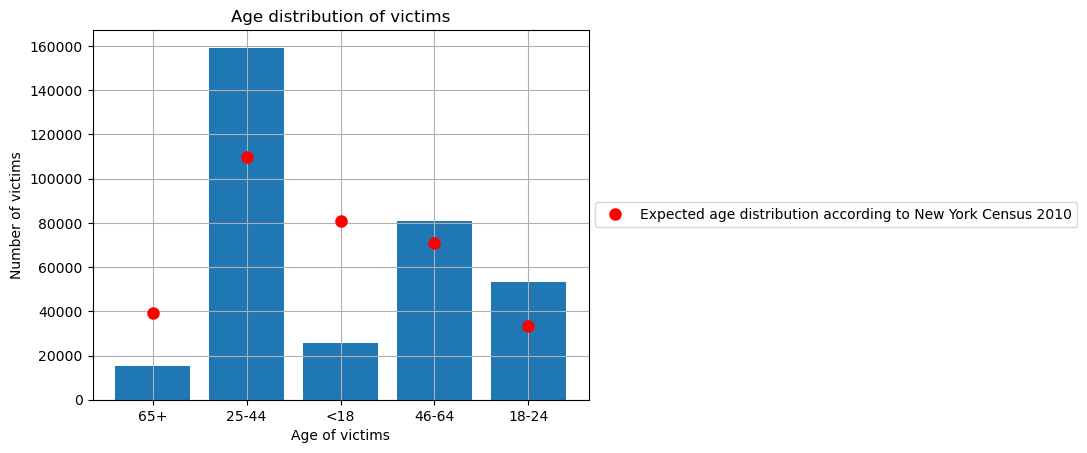

In [35]:
categories = ['65+', '25-44', '<18', '46-64', '18-24']
bin_edges = np.arange(len(categories) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
demographic['VIC_AGE_GROUP'].hist(bins=bin_edges, align='mid', rwidth=0.8);

# Format plot
plt.xticks(range(len(categories)), categories)
plt.xlabel('Age of victims')
plt.ylabel('Number of victims')
plt.title('Age distribution of victims')
plt.plot(range(len(categories)), [39124, 109767, 80940, 70744, 33498], 'o--', c='red', linewidth=0, markersize=8, label='Expected age distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
demographic['VIC_AGE_GROUP'].value_counts()

25-44    159208
45-64     80799
18-24     53441
<18       25553
65+       15072
Name: VIC_AGE_GROUP, dtype: int64

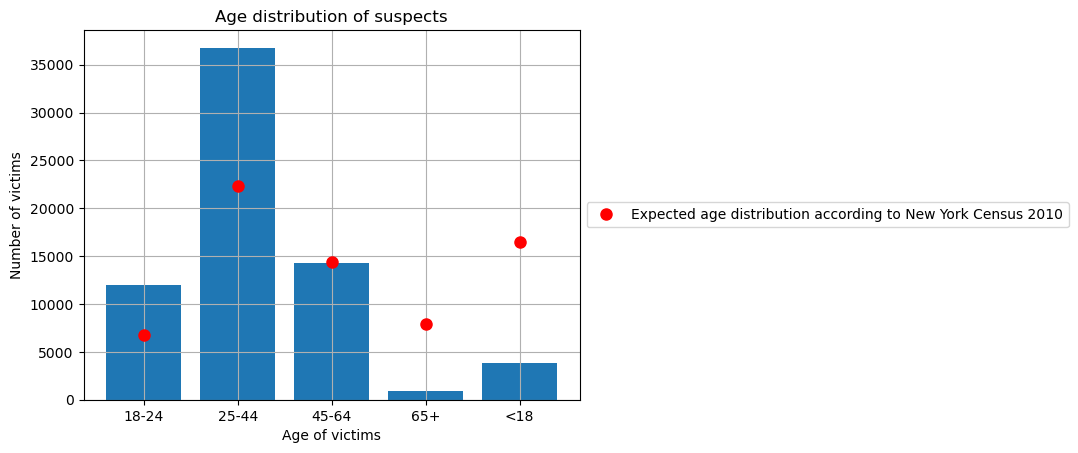

In [20]:
categories = ['18-24', '25-44', '45-64', '65+', '<18']
bin_edges = np.arange(len(categories) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
demographic['SUSP_AGE_GROUP'].hist(bins=bin_edges, align='mid', rwidth=0.8);

# Format plot
plt.xticks(range(len(categories)), categories)
plt.xlabel('Age of victims')
plt.ylabel('Number of victims')
plt.title('Age distribution of suspects')
plt.plot(range(len(categories)), [6800, 22282, 14360, 7942, 16430], 'o--', c='red', linewidth=0, markersize=8, label='Expected age distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
demographic['SUSP_AGE_GROUP'].value_counts()

25-44    36780
18-24    14337
45-64    11944
<18       3838
65+        915
Name: SUSP_AGE_GROUP, dtype: int64

In [22]:
demographic2 = demographic.drop(demographic[demographic['VIC_SEX'] == 'E'].index)
demographic2 = demographic2.drop(demographic[demographic['VIC_SEX'] == 'U'].index)
demographic3 = demographic.drop(demographic[demographic['SUSP_SEX'] == 'U'].index)

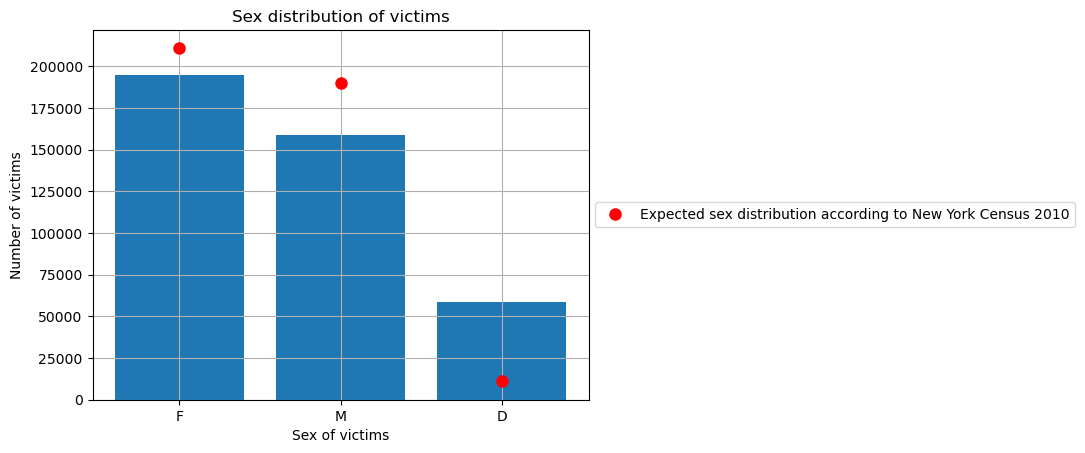

In [23]:
categories = ['F','M','D']
bin_edges = np.arange(len(categories) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
demographic2['VIC_SEX'].hist(bins=bin_edges, align='mid', rwidth=0.8);

# Format plot
plt.xticks(range(len(categories)), categories)
plt.xlabel('Sex of victims')
plt.ylabel('Number of victims')
plt.title('Sex distribution of victims')
plt.plot(range(len(categories)), [211227, 190181, 11027.0], 'o--', c='red', linewidth=0, markersize=8, label='Expected sex distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [24]:
demographic2['VIC_SEX'].value_counts()

F    195155
M    158775
D     58505
E         0
U         0
Name: VIC_SEX, dtype: int64

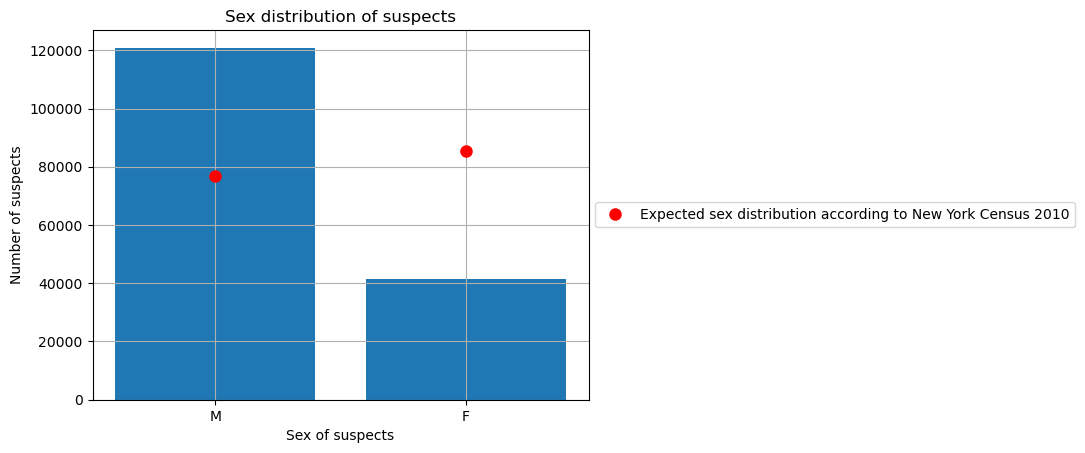

In [25]:
categories = ['M','F']
bin_edges = np.arange(len(categories) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
demographic['SUSP_SEX'].hist(bins=bin_edges, align='mid', rwidth=0.8);

# Format plot
plt.xticks(range(len(categories)), categories)
plt.xlabel('Sex of suspects')
plt.ylabel('Number of suspects')
plt.title('Sex distribution of suspects')
plt.plot(range(len(categories)), [76760.0, 85255.0], 'o--', c='red', linewidth=0, markersize=8, label='Expected sex distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [26]:
demographic3['SUSP_SEX'].value_counts()

M    120891
F     41124
U         0
Name: SUSP_SEX, dtype: int64

In [27]:
demographic3 = demographic.drop(demographic[demographic['VIC_RACE'] == 'Other'].index)
demographic3 = demographic3.drop(demographic3[demographic3['VIC_RACE'] == 'UNKNOWN'].index)

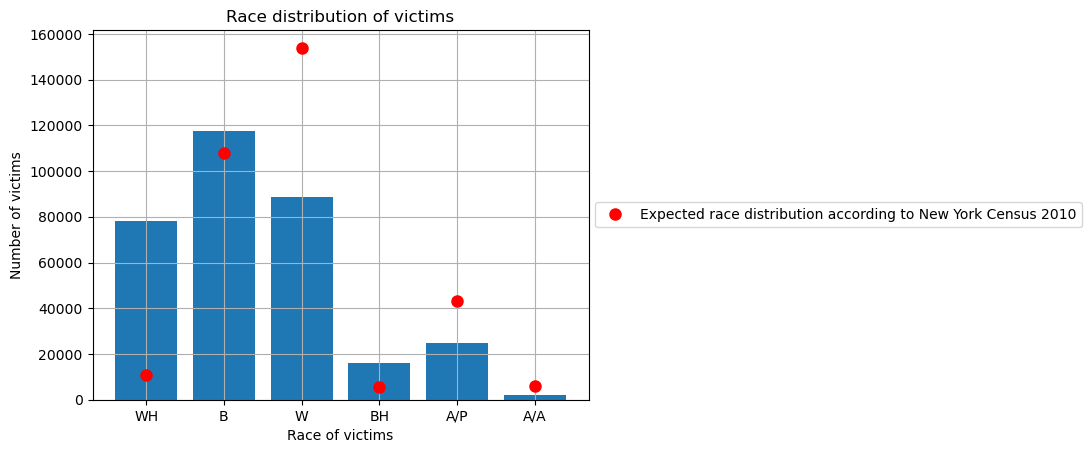

In [28]:
categories = ['WH','B','W','BH','A/P','A/A']
bin_edges = np.arange(len(categories) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
demographic3['VIC_RACE'].hist(bins=bin_edges, align='mid', rwidth=0.8);

# Format plot
plt.xticks(range(len(categories)), categories)
plt.xlabel('Race of victims')
plt.ylabel('Number of victims')
plt.title('Race distribution of victims')
plt.plot(range(len(categories)), [10921.0,107810.0,153915.0,5698.0,43025.0,6099.0], 'o--', c='red', linewidth=0, markersize=8, label='Expected race distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [29]:
demographic3['VIC_RACE'].value_counts()

BLACK                             117688
WHITE                              88656
WHITE HISPANIC                     78108
ASIAN / PACIFIC ISLANDER           25010
BLACK HISPANIC                     15880
AMERICAN INDIAN/ALASKAN NATIVE      2127
OTHER                                  0
UNKNOWN                                0
Name: VIC_RACE, dtype: int64

In [30]:
demographic4 = demographic.drop(demographic[demographic['SUSP_RACE'] == 'Other'].index)
demographic4 = demographic4.drop(demographic4[demographic4['SUSP_RACE'] == 'UNKNOWN'].index)

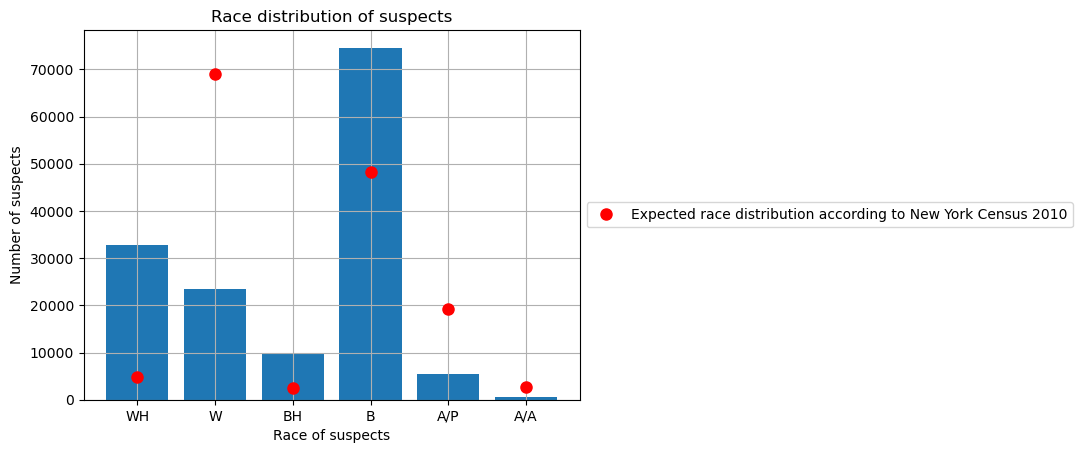

In [31]:
categories = ['WH','W','BH','B','A/P','A/A']
bin_edges = np.arange(len(categories) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
demographic4['SUSP_RACE'].hist(bins=bin_edges, align='mid', rwidth=0.8);

# Format plot
plt.xticks(range(len(categories)), categories)
plt.xlabel('Race of suspects')
plt.ylabel('Number of suspects')
plt.title('Race distribution of suspects')
plt.plot(range(len(categories)), [4895,68984,2554,48320,19284,2733], 'o--', c='red', linewidth=0, markersize=8, label='Expected race distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [32]:
demographic4['SUSP_RACE'].value_counts()

BLACK                             74594
WHITE HISPANIC                    32845
WHITE                             23471
BLACK HISPANIC                     9838
ASIAN / PACIFIC ISLANDER           5403
AMERICAN INDIAN/ALASKAN NATIVE      619
OTHER                                 0
UNKNOWN                               0
Name: SUSP_RACE, dtype: int64

   
<b>Q4 - a </b> From the plot, 19.9% of people are under 25 years old in Germany. German age statistics in wikipedia seem to much that population under 25 are around 22% or the population. is it that simple? what are we missing?
<br>

<b>Q4 - b)</b>  From the statistics provided, we see there is an almost equal proportion of males and females in Germany, but an analysis of the dataset shows a skew towards males (70% samples in the dataset correspond to males).

### Step 2: Outcome Skews --> Historical Bias

<b>Q5: Outcome Skews </b> 

Is there a skew towards certain groups? Are these groups historically marginalised or at risk of discrimination?:<br>

Use any combination of data visualisations, Tables, Textual "Statistics" and Textual analysis to address these guiding questions.

a) Analyse the dataset, and report the numbers of males/females with bad/good credit. Do the same for "old" / " young" people in the dataset. Normalise these numbers respectively over the total number of males/females, "old"/"young" for a fair comparison. For that, you can consider having 50 individuals for each of these groups.

b) Briefly describe your findings and explain the impacts (on fairness) of using this dataset as training data (if any)

<div class="alert alert-block alert-info">
<b> Tip: </b> We provide a function for Normalised count per attribut and lable you are free to use it or implement your own method 
    
`getNormalizedCount(pd_train_data, protected_attribute, label)`
</div>
    

In [33]:
# Normalised count per attribut and lable 
def getNormalizedCount(pd_train_data, protected_attribute, label):
    unnormalized_count = pd_train_data[[protected_attribute, label]].value_counts()
    counts = {}
    for attribute_value in pd_train_data[[protected_attribute]].value_counts().keys():
        counts[attribute_value[0]] = pd_train_data[[protected_attribute]].value_counts()[attribute_value]
    normalized_count = unnormalized_count[:]
    for attribute_value, credit_value in pd_train_data[[protected_attribute, label]].value_counts().keys():
        normalized_count[attribute_value, credit_value] = normalized_count[attribute_value, credit_value] * (50 / counts[attribute_value])
    return normalized_count

# add the credit labels to the data set.
pd_gdata["credit"] = dataset_gcredit.labels

NameError: name 'dataset_gcredit' is not defined

In [ ]:
### YOUR ANSWER HERE ###
# ADD code here to print the AGE-CREDIT distribution


# ADD code here to print the SEX-CREDIT distribution


# ADD code here to visualise the results for both you can use stacked bar plots from pandas toolkit
#<your dataframe>.size().unstack().plot(kind='bar', stacked=True)


-

<b>Correct Answer:</b>

<div class="alert alert-block alert-success">

    
<b>Q5 - a)</b> 

    age  credit

    1.0  1.0       36

         2.0       13
     
    0.0  1.0       28

         2.0       21

    sex  credit
    
    1.0  1.0       36
    0.0  1.0       32
    1.0  2.0       13
    0.0  2.0       17

For both protected attributes, the numbers are unequal. There is a certain bias.
Younger applicants tend to receive less positive outcomes than older ones. Male tend to receive more positive outcomes than females.

--------------

<b>Q5 - b)</b>  In the case where the real-world situation is considered fair, we might consider a classifier trained on this data fair. However, we would need to check whether its outputs indeed reflect these input distributions (this might not be the case when the classifier makes systematic mistakes, as Q5 showed inbalance, it might indeed make mistakes).

Often though, the real-world situation is considered unfair (e.g., credit ratings are given depending on some human biases) and hence datasets of historical decisions are unfair. A fair situation would often be if both the protected and unprotected groups have an equal likelihood of getting good/bad credit. Fot instance, there would be 21 good credits out of 50 for both "old" and "young" people. In such case, a classifier trained on the data we have here would not be considered fair.



</div>

In [ ]:
### YOUR ANSWER HERE ###

# The German data set contains 700 instances of good credit, and 300 instances of bad credit. 
# The good credit has credit value 1, the bad credit has credit value 2

# The people over 25 are labeled age == 1, the people under 25 are labeled age == 0
# ADD code here to print the AGE-CREDIT distribution
protected_attribute = "age"
label = "credit"
agecredit = getNormalizedCount(pd_gdata, protected_attribute, label)


# The female entries are labeled sex == 0, the male entries are labeled sex == 1
# ADD code here to print the SEX-CREDIT distribution
protected_attribute = "sex"
# label = "credit" already initialized
sexcredit= getNormalizedCount(pd_gdata, protected_attribute, label)


In [ ]:

# Example of overall distrimution
#<your data>.size().unstack().plot(kind='bar', stacked=True)
pd_gdata.groupby([ "age", "credit"]).size().unstack().plot(kind='bar', stacked=True)
plt.title('overall good and bad credit per age group');
plt.xticks(np.arange(0.05, 1, 0.9), labels=['< 25', '>= 25']);
plt.xlabel('Age of loan applicants');
plt.ylabel('Good/bad credit distribution');
plt.legend(['Good credit', 'Bad credit'], loc='lower center');

In [ ]:
pd_gdata.groupby([ "sex", "credit"]).size().unstack().plot(kind='bar', stacked=True)

plt.title('Overall good and bad credit per sex group');
plt.xticks(np.arange(0.05, 1, 0.9), labels=['Female', 'Male']);
plt.xlabel('Sex of loan applicants');
plt.ylabel('Good/bad credit distribution');
plt.legend(['Good credit', 'Bad credit'], loc='lower center');


In [ ]:
# Example of normalized distribution
# ADD code here to visualise the results for both you can use stacked bar plots from pandas toolkit

print(agecredit)
agecredit.unstack().plot.bar(stacked=True)
plt.title('Normalized good and bad credit per age group');
plt.xticks(np.arange(0.05, 1, 0.9), labels=['< 25', '>= 25']);
plt.xlabel('Age of loan applicants');
plt.ylabel('Good/bad credit distribution per 50 individuals');
plt.legend(['Good credit', 'Bad credit'], loc='lower center');


In [ ]:
print(sexcredit)
sexcredit.unstack().plot.bar(stacked=True)
plt.title('Normalized good and bad credit per sex');
plt.xticks(np.arange(0.05, 1, 0.9), labels=['Female', 'Male']);
plt.xlabel('Sex of loan applicants');
plt.ylabel('Good/bad credit distribution per 50 individuals');
plt.legend(['Good credit', 'Bad credit'], loc='lower center');

## Part IV. Discuss Measurement Bias.

Measurement Biases occur when choosing, collecting, or computing inadequate features and labels to use in a prediction problem. Features and labels are the concrete measurements chosen to approximate some construct (an idea or concept) that is not directly encoded or observable.
</br></br>

<b>Q6: Reflect on your featuers and lables</b> </br>
There is no "simple" answer to this question, nor a "technical" quick fix. Your reflection and analysis should be contextual and responsible. Use outputs from Lecture 1 and the Responsible Data Guiding Principles from (D’Ignazio & Klein, 2016) to carry out your analysis and identify measurement bias in your data project. In the following, we provide a set of guiding questions that could help you articulate your thoughts and discussion for this type of bias. 

***Sample of Guiding questions:***

a) Are you using inclusive non-harmful featuers and lables? 

b) Is your dataset making any harmful or discriminatory abstractions.

c) Are you using the correct "proxy"/"lable" to predict the correct "concept"

***Important Note***
The german data set is a processed and simplified dataset. It is not obvious what assumptions were made to clean and label the dataset there, for it is hard to identify Measurement Biases in this dataset. It does not mean it is bias-free. On the contrary, this should warn you about using pre-processed, pre-packaged datasets. They are loaded with biases you can not identify and asses


## End of the Lab, Well Done!